# Table of contents

1. [Define the parameters](#parameters)  
2. [Check that the Hebb rule works](#Hebb)   
3. [Train the network](#train)   
4. [Test the network](#test)  


<a id="parameters"> </a>

# Define the parameters

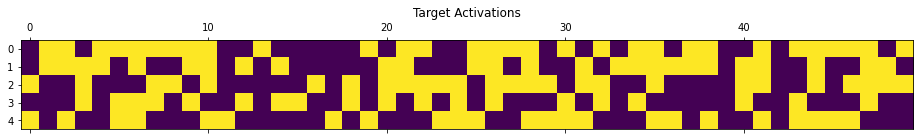

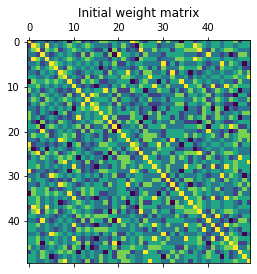

In [15]:
#------------------------------------------------------------------------------
# Import the libraries
#------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Set the seed
np.random.seed(0)

#------------------------------------------------------------------------------
# Define the parameters 
#------------------------------------------------------------------------------
L=10000 #simulation steps
I=50 #number of neurons
Nx=5 # number of examples
x = np.random.choice([-1, 1], size = (Nx, I)) #activations (N rows: patterns to be remembered; I cols: neurons)
w = np.dot(x.T, x) #initialize the weights using Hebb rule
t = np.clip(x, 0 , np.inf) #target activities (same as x)

#put all the parameters into a dictionary
params = {
    'L':L, # number of simulation steps
    'I':I, # number of sneurons
    'Nx': Nx, # number of examples
    'x': x, # starting activations
    'eta':0.005, # stepsize 
    'w':w, # weight matrix
    't':t, # target activity
    'alpha':0.001} 

#plot the activations
plt.matshow(t)
plt.title('Target Activations')
plt.show()

#plot the initial weight matrix
plt.matshow(w)
plt.title('Initial weight matrix')
plt.show()

<a id="Hebb"> </a>

# Check the Hebb rule

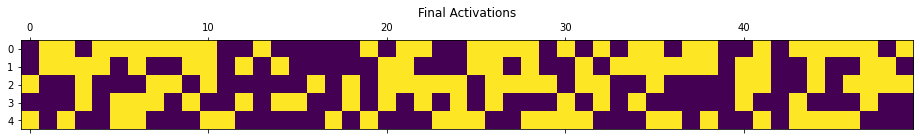

In [16]:
a = np.dot(x,w) #activations
a = np.sign(a)

# check that the final activations are the same as the initial activations (50 on the diagonal after the dot product indicates this)
np.dot(a, x.T)

#plot the initial weight matrix
plt.matshow(a)
plt.title('Final Activations')
plt.show()

<a id="train"> </a>

# Train the network

Text(0.5, 1.0, 'Dot product')

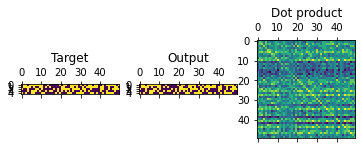

In [53]:
#------------------------------------------------------------------------------
# Import the libraries
#------------------------------------------------------------------------------
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import math

class Hopfield:
    """
    --------------------------------------------------------------------------
    Description
    --------------------------------------------------------------------------
    Hopfield network implemented as descirbed in Chaapter 43. MacKay 2003.
    --------------------------------------------------------------------------
    Methods
    --------------------------------------------------------------------------
    train(): train a Hopfield network
   
    """

    def __init__(
            self, params
    ):
            """Initialize the Hopfield network object parameters
            ----------
            """
            
            # unpack the params dictionary
            self.x=params['x'] #activities
            self.t=params['t'] #target activities
            self.w=params['w'] #weight matrix
            self.eta=params['eta'] #step size
            self.L=params['L'] #number of iterations
            self.I=params['I'] #number of neurons
            self.Nx=params['Nx'] #number of examples
            self.alpha=params['alpha'] 

    def train(self):
        """
        --------------------------------------------------------------------------
        Description
        --------------------------------------------------------------------------
        Function for training a Hopfield network with Hebbian learning
        --------------------------------------------------------------------------
        Input
        --------------------------------------------------------------------------
        L -- number of simulation steps
        I -- number of sneurons
        Nx -- number of examples
        x -- starting activations
        eta -- stepsize 
        w -- weight matrix
        t -- target activity
        alpha -- weight decay

        --------------------------------------------------------------------------
        Output
        --------------------------------------------------------------------------
        w - a matrix of weights
        y - output
        --------------------------------------------------------------------------
        """  
               
        # For each simulation step
        for t in range(self.L):
                       
            # for each neuron
            for i in range(self.I):
                self.w[i,i] = 0 #ensure that the self connections are 0
            
            a = np.dot(self.x, self.w) # compute all activations
            y = 1 / (1 + np.exp(-a)) # sigmoid (THIS SHOULD BE ADDED)
            e = self.t-y #compute all errors
            gw = np.dot(self.x.T, e) # compute the gradients
            gw = gw + np.transpose(gw) #symmetrize gradients
            
            self.w = self.w + self.eta * (gw - self.alpha * self.w) #make step
            
        return self.w, y
    

#------------------------------------------------------------------------------
# Train the network
#------------------------------------------------------------------------------

# define the network object
network = Hopfield(params)

# train
W, y = network.train()
np.round_(y,decimals=2)
y[y == 0.] = -1.

# plot the initial and the output activations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.matshow(t)
ax1.set_title("Target")
ax2.matshow(x)
ax2.set_title("Output")
ax3.matshow(np.dot(x.T,y) )
ax3.set_title("Dot product")

<a id="test"> </a>

# Test the network

In [54]:
#------------------------------------------------------------------------------
# Test
#------------------------------------------------------------------------------

# define the new input

x1 = deepcopy(x)
x1[-2:] = x1[-2:] * (-1)